# [9660] Logistic Regression 2
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Pima_diabetes.csv

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 09/24/24 12:11:23


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

### Load data

In [3]:
# You can download the original data set from
#  https://www.kaggle.com/uciml/pima-indians-diabetes-database/data
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Pima_diabetes.csv')

### Examine data

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Notes:  
* Target variable: Outcome  
* Notice zero values for blood pressure, skin thickness, insulin, BMI, etc. (we will ignore this for now)

In [6]:
# Check for missing values (nulls)
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Exploratory data analysis (EDA)

In [7]:
# Compute pairwise correlation of columns, excluding NA/null values
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


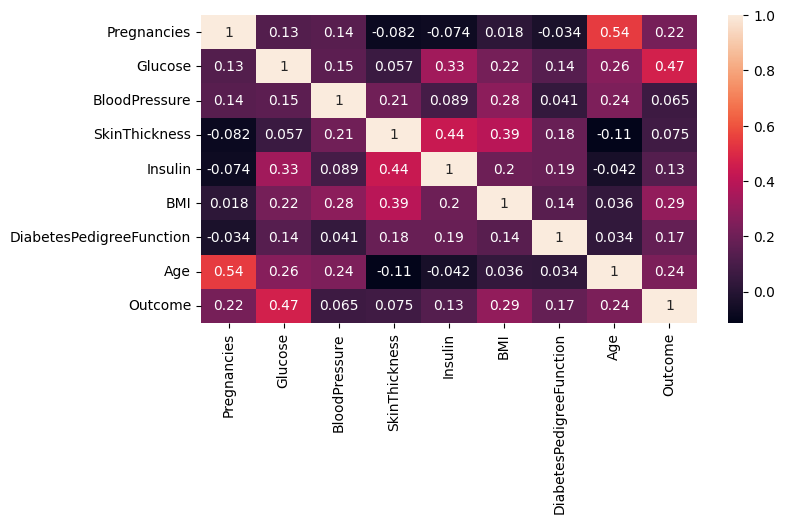

In [8]:
# Plot data as a color-encoded correlation matrix
plt.subplots(figsize=(8,4))
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot=True)
plt.show()

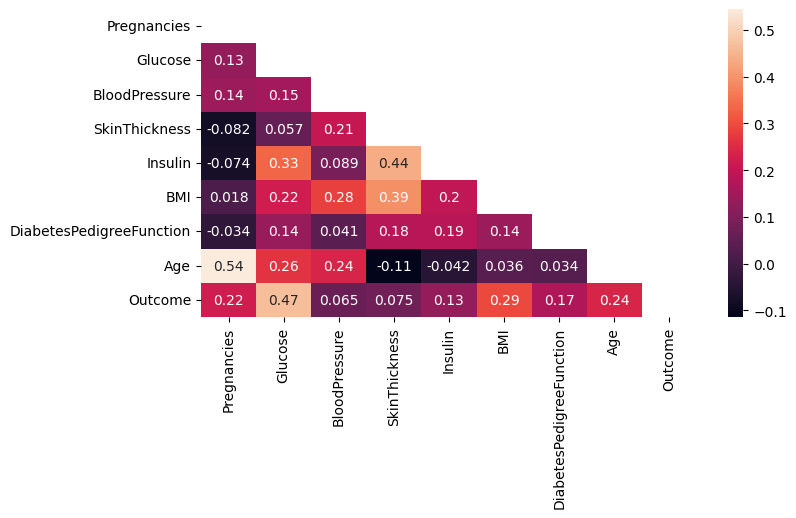

In [9]:
# Plot data as a color-encoded correlation matrix. Only display bottom triangle of matrix.
plt.subplots(figsize=(8,4))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot=True, mask=mask)
#plt.savefig('DiabetesCorrelationMatrix')
plt.show()

In [10]:
# Review distribution of targets (outcome)
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


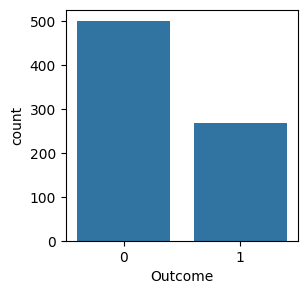

In [11]:
# Plot outcome counts
plt.subplots(figsize=(3,3))
sns.countplot(x='Outcome', data=df)
plt.show()

### Prepare data

In [12]:
# Separate independent and dependent variables
X = df.iloc[:, :-1]     # independent variables - all columns except last one
y = df.iloc[:, -1]      # dependent variable - last column

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### Normalization and Standardization

In [14]:
# Normalize data values.  Technique used is called min-max normalization.
X_normalized = (X - X.min()) / (X.max() - X.min())

In [15]:
X_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [16]:
# Standardize data values.  Technique used is called mean normalization.
X_standardized = (X - X.mean()) / X.std()

In [17]:
X_standardized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483


#### We could use EITHER the normalized OR the standardized data for model training, but NOT both
We will use the normalized data for our model training

In [18]:
# Split data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, stratify=y,
                                                    test_size=0.25, random_state=42)

### Train model

In [19]:
# Train logisitic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### For binary-class (exactly 2 classes) problems, logistic regression creates one classifier
* For example, in this case where the dataset has exactly 2 classes, sklearn's LogisticRegression creates 1 classifier with 1 intercept and 1 set of coefficents.

In [20]:
print(f"classes: {model.classes_}\n")
print(f"number of features: {model.n_features_in_}\n")
print(f"features: {model.feature_names_in_}\n")
print(f"intercept: {model.intercept_}\n")
print(f"coefficents: {model.coef_}")

classes: [0 1]

number of features: 8

features: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']

intercept: [-5.47567328]

coefficents: [[ 1.53135994  4.51567037 -0.43203992  0.12705154  0.26604552  3.02095085
   1.14414872  0.91617288]]


### Test model

In [21]:
# Generate predictions against the test set
predictions = model.predict(X_test)

### Model evaluation
#### Model performance to be discussed later in this class

In [22]:
# Calculate model accuracy
accuracy = model.score(X_test, y_test)
print("accuracy =", round((accuracy * 100), 2), "%")

accuracy = 74.48 %


In [23]:
# Print classification report
#  Check precision, recall, f1-score
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, predictions, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.76      0.88      0.82       125
   with diabetes       0.69      0.49      0.57        67

        accuracy                           0.74       192
       macro avg       0.73      0.69      0.70       192
    weighted avg       0.74      0.74      0.73       192



In [24]:
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[110,  15],
       [ 34,  33]])

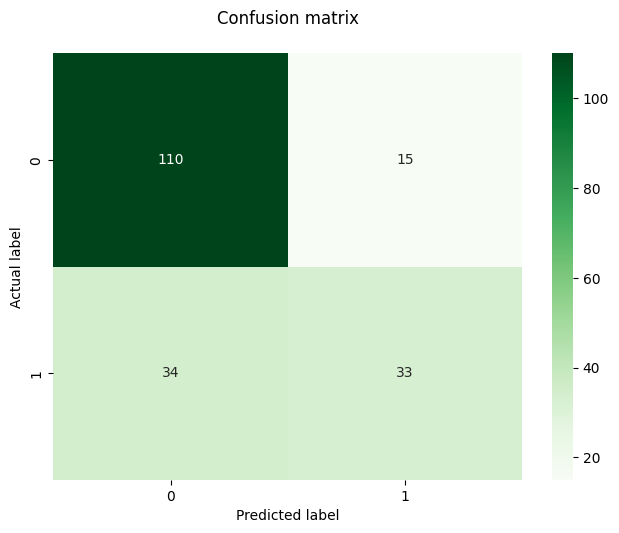

In [25]:
# Visualize Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

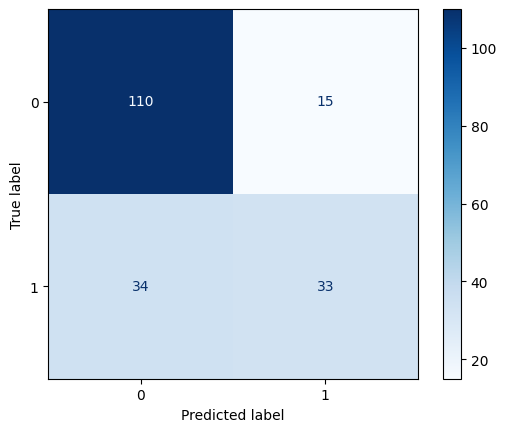

In [26]:
# Display confusion matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
# Display the probability of each class for each data instance
model.predict_proba(X_test)

array([[0.58572962, 0.41427038],
       [0.63832402, 0.36167598],
       [0.8396453 , 0.1603547 ],
       [0.56591913, 0.43408087],
       [0.30359417, 0.69640583],
       [0.78267989, 0.21732011],
       [0.66305533, 0.33694467],
       [0.91639797, 0.08360203],
       [0.45872461, 0.54127539],
       [0.898054  , 0.101946  ],
       [0.70693626, 0.29306374],
       [0.33017887, 0.66982113],
       [0.73323284, 0.26676716],
       [0.82330845, 0.17669155],
       [0.47189924, 0.52810076],
       [0.25856872, 0.74143128],
       [0.59579285, 0.40420715],
       [0.84208526, 0.15791474],
       [0.93578587, 0.06421413],
       [0.70764431, 0.29235569],
       [0.86499929, 0.13500071],
       [0.734029  , 0.265971  ],
       [0.8512757 , 0.1487243 ],
       [0.32993442, 0.67006558],
       [0.19363038, 0.80636962],
       [0.30316891, 0.69683109],
       [0.83742661, 0.16257339],
       [0.87743739, 0.12256261],
       [0.20000098, 0.79999902],
       [0.38793061, 0.61206939],
       [0.

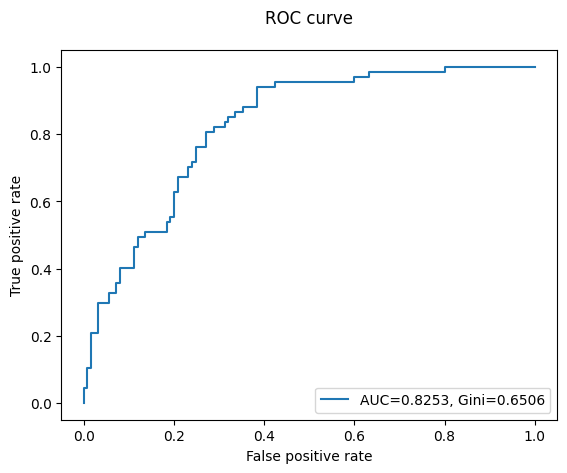

In [28]:
# Display ROC curve
#  Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate
#  It shows the tradeoff between sensitivity and specificity
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba),4)
gini = round(((auc * 2) - 1),4)
label_string = f'AUC={auc}, Gini={gini}'
plt.plot(fpr, tpr, label=label_string)
plt.legend(loc=4)
plt.title('ROC curve', y=1.05)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

### Understand how the features influenced the model

In [29]:
# Extract feature names
labels = list(X_train.columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [30]:
coeff = list(model.coef_[0])
coeff

[1.531359941475136,
 4.515670366864532,
 -0.4320399184424875,
 0.12705153767178198,
 0.26604551932955084,
 3.0209508507349243,
 1.1441487209746428,
 0.9161728816306092]

Text(0.5, 0, 'Importance')

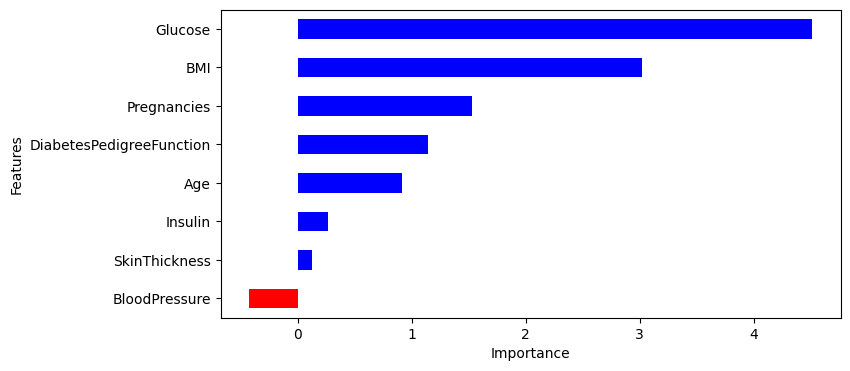

In [31]:
# Visualize how the model uses different features and which features have greater effect
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(8, 4),
                         color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')